<a href="https://colab.research.google.com/github/Flaviaestat/Phyton/blob/master/00_Principais_Phyton_Atualizado!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### RESUMÃO PHYTON

#### Operadores, loops e funções básicas

Operadores Condicionais


In [ ]:
x = 300

if x == 300:
  status = 'Na mosca!'
elif x > 300:
  status = 'Maior!'
else:
  status = 'Menor :('

print('O valor é ' + status)



O valor é Na mosca!


Estrutura de loop básica


In [ ]:
for i in range(0,5):
  
  print(i)
  print( i * 2)


0
0
1
2
2
4
3
6
4
8


In [ ]:
numeros = []
multiplo = 2

ultimoDoRange = 20

for i in range(0, ultimoDoRange + 1):
  resto = i%multiplo
  numeros.append( i * resto)

print('Transforma em zero os multiplos de ' + str(multiplo) + ' :')
print(numeros)
print('O último elemento é')
print(numeros[-1])

print('O penúltimo elemento é')
print(numeros[-2])

print('O primeiro elemento é')
print(numeros[0])
print('O segundo é')
print(numeros[1])




Transforma em zero os multiplos de 2 :
[0, 1, 0, 3, 0, 5, 0, 7, 0, 9, 0, 11, 0, 13, 0, 15, 0, 17, 0, 19, 0]
O último elemento é
0
O penúltimo elemento é
19
O primeiro elemento é
0
O segundo é
1


Input box

In [ ]:
  age = input('Qual a sua idade?')


Qual a sua idade?40


In [ ]:
age

'40'

#### Função básica

In [ ]:
def idade(n):
  m = int(n)
  x = m * 2
  y = m / 2
  print('o dobro da sua idade é: ' + str(x))
  print('a metade da sua idade é: ' + str(y))



In [ ]:
# Chamada da função
idade(age)

o dobro da sua idade é: 80
a metade da sua idade é: 20.0


In [ ]:
def fizzBuzz(n):
    # Write your code here

    for i in range (1,n+1):

        if i%3 == 0 and i%5 == 0:
            print('FizzBuzz')
        elif i%3 == 0:
            print('Fizz')
        elif i%5 == 0:
            print('Buzz')
        else:
            print(i)

fizzBuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


Manipulação com arrays

In [ ]:
dates = ['2018-01-01','2017-02-01', '2019-10-01']
evento = ['A','B','C']
valores = [200,300,400]
categoria = ['XL', 'XL','XS']

months = dates[5:1] #não consegui extrair uma posição no string do array - mais fácil no pandas
print(months)


[]


In [ ]:
estados = ['GO', 'GO', 'SP', 'RJ']

estados_distintos = set(estados)

print(estados_distintos)

for index,element in enumerate(estados_distintos):
    lista = index,element

print(lista)


{'SP', 'GO', 'RJ'}
(2, 'RJ')


#### Transforma arrays em dataframe **

In [ ]:
import numpy as np
import pandas as pd

#tranforma o arrays em colunas no mesmo dataframe

datesDf = pd.DataFrame({'Data': dates, 'Evento': evento, 'Valores': valores, 'Categoria': categoria})


#### Carregamento de bases por etapas / apendar dataframes

In [ ]:
safras = ['2017', '2018', '2019', '2020', '2021', '2022']

pers = pd.DataFrame()
for i in safras:
     query = "select * from customer_sandbox_zone.flavia_analise_timespan_agg " + '\n'
     query = query + "where substring(ds_safra, 1, 4) = '" 
     query = query + i + "'"
     print(query)
     temp_pers = ac.df_athena_q('flavia-costa', query)
     pers = pers.append(temp_pers)

####  Manipulaçao de datas

Criando colunas de datas

In [ ]:
datesDf['Date'] = pd.to_datetime(datesDf['Data']) #padrão dateTime

datesDf['Date'] = pd.to_datetime(datesDf['Data'], format='%Y%m%d', errors='ignore') #padrão dateTime


# datesDf['ano'] = datesDf['Date'].map(lambda x: x.strftime('%Y'))
# datesDf['Dia'] = datesDf['Date'].map(lambda x: x.strftime('%D'))

datesDf.head()

,Data,Evento,Valores,Categoria,Date,ano
0,2018-01-01,A,200,XL,2018-01-01,2018
1,2017-02-01,B,300,XL,2017-02-01,2017
2,2019-10-01,C,400,XS,2019-10-01,2019


In [ ]:
#DATAS CALCULADAS PARA BUSCAR MÊS FECHADO
from datetime import datetime
from dateutil.relativedelta import relativedelta


today = datetime.today().strftime('%Y-%m-%d')
today_ma = (datetime.today() + relativedelta(months=-1))
today_ma_str = today_ma.strftime('%Y-%m-%d') #dia da extração mes anterior
since = today_ma_str[0:7] + "-01" #mes anterior - dia primeiro
until_aux = last_date_of_month = datetime(today_ma.year, today_ma.month, 1) + relativedelta(months=1, days=-1)
until = until_aux.strftime('%Y-%m-%d')

In [ ]:
#calcula o fim do mes atual
fim_mes = (datetime(datetime.today().year, datetime.today().month, 1) + relativedelta(months=1, days=-1)).strftime('%Y-%m-%d')
diasmes = fim_mes[8:10]

In [ ]:
print(today, since, until)

2020-09-08 2020-08-01 2020-08-31


In [ ]:
#carrega base em csv

path = ''

baseDfCsv = pd.read_csv(path)

#### **Descrever features**

In [ ]:
datesDf.describe()

,Valores
count,3.0
mean,300.0
std,100.0
min,200.0
25%,250.0
50%,300.0
75%,350.0
max,400.0


#### Criando um contador (índice)

In [ ]:
datesDf['Indice'] = list(range(len(datesDf.index)))
datesDf['Indice'] = datesDf['Indice'] + 1

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice
0,2018-01-01,A,200,XL,2018-01-01,2018,1
1,2017-02-01,B,300,XL,2017-02-01,2017,2
2,2019-10-01,C,400,XS,2019-10-01,2019,3


Contar distintos em um dataframe

In [ ]:
print(len(datesDf['Categoria'].unique()))

2


In [ ]:
Contagem por categoria, valor

In [ ]:
datesDf['Categoria'].value_counts()

#### Contagem por var categorica

In [ ]:
baseCount = datesDf.groupby("Categoria")["Categoria"].count() #tb funciona para sum

baseCount.head(5)


Categoria
XL    2
XS    1
Name: Categoria, dtype: int64

In [ ]:
baseSum = datesDf.groupby("Categoria")["Valores"].sum()

baseSum.head(5)

Categoria
XL    500
XS    400
Name: Valores, dtype: int64

Agregação Outras funções

#### *Agregação* (médias, min, max) das variáveis numéricas por grupo

In [ ]:
baseAgg = datesDf.groupby('Evento').agg({'Valores':['min','max','mean', 'first','last'], 'Categoria':['first']})

baseAgg.head(5)

Valores                      Categoria
           min  max mean first last     first
Evento                                       
A          200  200  200   200  200        XL
B          300  300  300   300  300        XL
C          400  400  400   400  400        XS

#### Agregar com parametros variaveis

In [ ]:
vars_agregacao = ['proba_bin', 'limite_bin', 'sow_bin', 'renda_declarada_bin', 'fx_atraso_jun22', 'nr_behavior_score', 'score_gh']
agg = pb_add.groupby(vars_agregacao).agg({'conta_cartao':['count']})
agg.columns = agg.columns.droplevel(0)
agg = agg.reset_index()
agg.head()


#### Agregate simples (equivalente ao count(*))

In [ ]:
df.groupby(['col1', 'col2']).size()

In [ ]:
# top selling items by sales
sales_order = main_df.groupby('description').sum()['tot_order'].nlargest(10)

#### If para criação de coluna (Case )

In [ ]:
#função para usar com apply
def faixas_30(x):
    if x < 30:
        return 'a. menos 1 mes'
    elif x < 60:
        return 'b. 1 mes'
    elif x < 90:
        return 'c. 2 meses'
    elif x < 120:
        return 'd. 3 meses'
    elif x < 149:
        return 'e. 4 meses'
    elif x < 179:
        return 'f. 5 meses'   
    elif x < 209:
        return 'g. 6 meses' 
    elif x < 239:
        return 'h. 7 meses'     
    elif x < 269:
        return 'i. 8 meses' 
    elif x < 299:
        return 'j. 9 meses' 
    elif x < 329:
        return 'k. 10 meses' 
    elif x < 364:
        return 'l. 11 meses'
    elif x < 7200:
        return 'm. mais de 12 meses'  
    else:
        return 'n. sem transacao'

In [ ]:
#Composto com mais variáveis
def regra_flex_new(row):
    ### Mulher, Solteira, Até 24 anos, cidade Pequena do Sudeste ou Norte, renda declarada inferior a R$ 1K ou Não declarada
    if row['ds_gender'] == 'FEMALE' \
    and row['ds_marital_status'] != 'MARRIED' \
    and row['ds_idade'] <= 24 \
    and row['ds_city_size'] == 'pequeno' \
    and (row['ds_region'] == 'Sul' or row['ds_region'] == 'Sudeste') \
    and (row['renda_declarada'] >= 0 and row['renda_declarada'] < 1000):
        return '8'
    ### Mulher, Solteira, Até 24 anos, cidade Média do Sudeste, renda declarada maior ou igual a R$ 1K
    elif row['ds_gender'] == 'FEMALE' \
    and row['ds_marital_status'] != 'MARRIED' \
    and row['ds_idade'] <= 24 \
    and row['ds_city_size'] == 'medio' \
    and (row['ds_region'] == 'Sul' or row['ds_region'] == 'Sudeste') \
    and row['renda_declarada'] >= 1000:
        return '1'

data_pop['codigo'] = data_pop.apply(eval(f'cl.{regra_flex_new}'), axis=1)

#### Cria coluna com np.where

In [ ]:
df_final['segmento1'] = np.where((df_final['transacoes_mes_atual'] == 0) & (df_final['transacoes_mes_anterior'] > 0),  'Deixou de comprar',
                        np.where((df_final['transacoes_mes_atual'] > 0) & (df_final['transacoes_mes_anterior'] == 0), 'Passou a comprar',
                        'Presente nos dois meses'))

#### Deduplicar

In [ ]:
.drop_duplicates()

#### Dropar coluna do df (drop)

In [ ]:
df.pop('class')

#### Alterar tipo da variável

In [ ]:
ser.astype('category')
ser.astype('int')
ser.astype('str')

In [ ]:
#exception para alterar o tipo ignorando os literais
def num(s):
    try:
        return int(s)
    except ValueError:
        return 0

#### Ordenar - sort

In [ ]:
df.sort_values('coluna', ascending = False)

#### Exemplos de agregação retirando outros níveis da label

In [ ]:
vars_agregacao = ['proba_bin', 'limite_bin', 'sow_bin', 'renda_declarada_bin', 'fx_atraso_jun22', 'nr_behavior_score', 'score_gh']
agg = pb_add.groupby(vars_agregacao).agg({'conta_cartao':['count']})
agg.columns = agg.columns.droplevel(0)
agg = agg.reset_index()
agg.head()


In [ ]:
#agregação com colunas da base como variável
col_agg1 = dfr.drop(coluna_contagem, axis = 1).columns.to_list()
agg1 = dfr.groupby(col_agg1).agg({'cpfs':['sum']})

#### Pivot tables

In [ ]:
df2.pivot_table(values='X', rows='Y', cols='Z', aggfunc=lambda x: len(x.unique()) 

In [ ]:
dados_rfm_mes.pivot_table(index = 'segmento_rfm', columns= 'mes_ref', values = 'contas', aggfunc=np.sum)

#### Transpor e transformar colunas em linhas (melt)

In [ ]:
df_model = df_model.drop(['n_cluster'], axis = 1).set_index('var_value').transpose().reset_index()


In [ ]:
df.T

In [ ]:
df_melt = pd.melt(df_model, id_vars=['index'])

#### Funções string

In [ ]:
#posição do conteúdo de uma coluna em outra
City = df['cidade'].values.astype(str)
Estab = df['estab_clean'].values.astype(str)
df = df.assign(pos = find(Estab, City, start=0, end=None))

#replace de coluna
df = df.assign(estab_clean_2 = replace(Estab, City, ''))
df = df.assign(pos_espaco = find(Estab, ' ', start=0, end=None))
df['tam_caract_cidade'] = df['cidade'].str.len()

#retira tokens consecutivos
df['estab_clean_3'] = df['estab_clean_3'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')

#substring com posições definidas
dados_rfm_mes['ano'] = dados_rfm_mes['mes_ref'].str[:4]

#não contém - negação é ~
arqfinal_agg2 = arqfinal_agg[~arqfinal_agg['nm_estabelecimento'].str.contains(';')]


In [ ]:
#
def trata_estabelecimentos(x):
    x = re.sub(r'(^(?=.*\bLOJAS)(?=.*AMERICANAS\b).*$)', 'LOJAS AMERICANAS', x)
    #POSSUI UBER E EATS
    x = re.sub(r'(?=.*\bUBER\b)(?=.*\bEATS\b).*$', 'UBER EATS', x)
    #POSSUI UBER E NÃO EATS
    x = re.sub(r'(?=.*\bUBER\b)(?!.*EATS\b).*$', 'UBER', x)
    x = re.sub(r'^(?=.*\bGOOGLE)(?=.*GARENA\b).*$', 'GOOGLE GARENA', x)
    x = re.sub(r'(?=.*\bGOOGLE TEMPORARY HOLD\b).*$', 'GOOGLE TEMPORARY HOLD', x)
    x = re.sub(r'(?=.*\bIFD BR).*$', 'IFOOD', x)
    x = re.sub(r'(?=.*\bIFOOD).*$', 'IFOOD', x)
    x = re.sub(r'(?=.*\bOBOTICARIO).*$', 'OBOTICARIO', x)
    x = re.sub(r'(?=.*\bHNA BOTICARIO).*$', 'OBOTICARIO', x)
    x = x.replace('DL GOOGLE','GOOGLE')
    x = x.replace('MERCPAG GOOGLEPLAY','GOOGLE PLAY')
    x = x.replace('GOOGLEPLAY','GOOGLE PLAY')
    x = x.replace('C E A', 'C A MODAS')

    #PARA ESSES CASOS EU NÃO QUERO BUSCAR TODA A STRING
    x = x.replace('MERCADOPAGO MERC ', 'MERCADOPAGO ')
    x = x.replace('MERCPAG MERCADOLIVRE', 'MERCADOLIVRE')
    x = x.replace('MERCPAGO', 'MERCADOPAGO')
    x = x.replace('MERCPAG', 'MERCADOPAGO')     
    x = x.replace('EBANX','')
       
    x = x.strip()
    return x

#### Seleciona Colunas

In [ ]:
# select only required columns
baseReduzida = datesDf[["Valores", "Evento"]]

baseReduzida.head()

,Valores,Evento
0,200,A
1,300,B
2,400,C


Cria nova coluna

In [ ]:
datesDf['Valores10Perc'] = datesDf['Valores'] * 1.1 #metodo mais simples - aplicando crescimento de 10%
datesDf['Valores20Perc'] = datesDf['Valores'].apply(lambda x: x * 1.2) #com apply - aplicando crescimento de 20%

#função que multiplica por 2 para ser aplicado na coluna
def doubleData(x):
   return x * 2

datesDf['ValoresDobro'] = datesDf['Valores'].apply(doubleData) #com apply e função doubleData

#função para criar faixa de valores
def Status(x):
  if x >= 300:
    return 'faixa1'
  else:
    return 'faixa0'

datesDf['Status'] = datesDf['Valores'].apply(Status) #com apply e função de classificação

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1


#### Função de percentiles

In [ ]:
def q50(x):
            return x.quantile(0.5)
# 90th Percentile
def q90(x):
            return x.quantile(0.9)   

#### Plot simples

In [ ]:
ax = invoice_period_agg['total_customers'].cumsum().plot()
ax2 = invoice_period_agg['tot_order'].cumsum().plot()
ax.set_yscale('log')

#### Tratamento NULLS

In [ ]:
datesDf['exemploNull'] = np.nan # criando coluna de nulls para exemplo

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,NaN
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,NaN
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,NaN


Operating on Null Values
As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

isnull(): Generate a boolean mask indicating missing _cs
notnull(): Opposite of isnull()
dropna(): Return a filtered version of the data
 fillna(): Return a copy of the data with missing values filled or imputed

In [ ]:
datesDf['exemploNull'] = datesDf['exemploNull'].fillna(0.0) #recodificando para 0

datesDf.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,0.0


#### Filtrar

In [ ]:

 #primeira forma
datesFilter = datesDf[datesDf['Status'] == 'faixa1']



#### Filtrar por lista

In [ ]:
faixas = ['faixa1'] #permite mais de um valor

datesFilter = datesDf[datesDf.Status.isin(faixas)]

datesFilter.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,0.0


#### Filtrar com não contém

In [ ]:
faixas = ['faixa1']#permite mais de um valor

datesFilter = datesDf[~datesDf.Status.isin(faixas)] # naõ contém 

datesFilter.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0


#### Join

In [ ]:
# Trazendo a descrição dos eventos A, B e C para o dataFrame "datesDf"
# Mas antes, vou criar um dataframe de testes "DescriEventosDf" com a descrição dos eventos A e B (não incluirei C para testar)  

ChaveEventos = ['A','B']
DescriEventos = ['Transacao concluida', 'Transacao negada']
DescriEventosDf = pd.DataFrame({'Evento': ChaveEventos, 'Desc_Evento': DescriEventos})


In [ ]:
datesDfAdd = datesDf.join(DescriEventosDf.set_index('Evento'), on = 'Evento', how = 'left' )

#pode usar lsuffix e rsuffix quando o nome das chaves é diferente. Ex: lsuffix='_caller', rsuffix='_other' (nesse caso não precisa inserir on e how)

datesDfAdd.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull,Desc_Evento
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0,Transacao concluida
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0,Transacao negada
2,2019-10-01,C,400,XS,2019-10-01,2019,3,440.0,480.0,800,faixa1,0.0,NaN


In [ ]:
datesDfAdd2 = datesDf.join(DescriEventosDf.set_index('Evento'), on = 'Evento', how = 'right' )

datesDfAdd2.head(5)

,Data,Evento,Valores,Categoria,Date,ano,Indice,Valores10Perc,Valores20Perc,ValoresDobro,Status,exemploNull,Desc_Evento
0,2018-01-01,A,200,XL,2018-01-01,2018,1,220.0,240.0,400,faixa0,0.0,Transacao concluida
1,2017-02-01,B,300,XL,2017-02-01,2017,2,330.0,360.0,600,faixa1,0.0,Transacao negada


#### Histograma

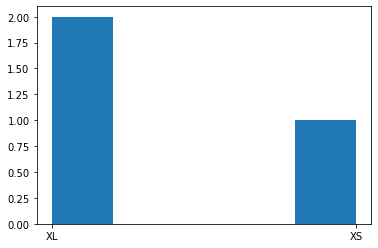

In [ ]:
import matplotlib.pyplot as plt

plt.hist(datesDf['Categoria'], bins = 5)

plt.show()

#### Scatterplot

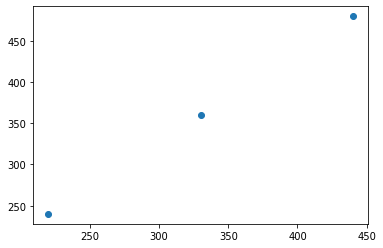

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(datesDf['Valores10Perc'],datesDf['Valores20Perc'])

#### Gráfico Plotly

In [ ]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px

plotly.offline.init_notebook_mode()
variavel = 'ds_safra'

df_agg_2 = df_agg.pivot_table(columns=variavel,index = 'personas_cluster', values='clientes', aggfunc=np.sum)
df_agg_2 = df_agg_2.query('personas_cluster != "Outros"')
for i in df_agg_2.columns:
    df_agg_2[i] = df_agg_2[i] / df_agg_2[i].sum()

df_agg_2 = df_agg_2.reset_index()
df_agg_2 = pd.melt(df_agg_2, id_vars=['personas_cluster'])
df_agg_2['value'] = df_agg_2['value'] * 100
fig = px.bar(df_agg_2, x=variavel, y="value",color = "personas_cluster" , barmode="group")
fig.show()
x = df_agg_2[variavel]
y = df_agg_2.personas_cluster
z = df_agg_2.value.round(1)

fig = go.Figure(data=go.Heatmap(
        z=z,
        x=x,
        y=y,
        colorscale='oranges', texttemplate="%{z}", textfont={"size":8}))

fig.update_layout(
    title='Personas por ' + variavel
    , height = 700
    #, width = 800
    , xaxis_nticks=36)

fig.show()

#### Gráfico Seaborn com Loop - com agregação antes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

vars_agregacao = ['ie_bin' , 'cred_bin', 'limite_bin', 'nr_behavior_score', 'score_gh'] #vão estar no x. Precisam ser categóricas

for i in vars_agregacao:
    group_var = 'proba_bin' #vai estar na legenda
    x_var = i 
    campo_contagem = 'count'
    agg = pb_add.groupby([i, group_var]).agg({'conta_cartao':['count']})
    agg.columns = agg.columns.droplevel(0)
    agg = agg.reset_index()
    df_viz = agg.pivot_table(columns=x_var,index = group_var, values=campo_contagem, aggfunc=np.sum)

    for i in df_viz.columns:
        df_viz[i] = df_viz[i] / df_viz[i].sum()

    df_viz = df_viz.reset_index()
    df_viz = pd.melt(df_viz, id_vars=[group_var])
    df_viz['value'] = df_viz['value'] * 100
    x = df_viz[x_var].astype('str')
    y = df_viz[group_var].astype('str')
    z = df_viz.value.round(1)
    plt.figure(figsize = (20,10))
    sns.barplot(data = df_viz, x = x, y = z, hue = y, palette="ch:s=1,rot=-2")
    plt.show()

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(data = pb_add, y = 'pc_sow', x = 'proba_bin', hue='flag_baixo_ie_cred') #hue não fica tão legal com muitas categorias. Y é uma measure
plt.show()

### ADVANCED ANALYTICS

https://github.com/Flaviaestat/Phyton/blob/master/Case_Ame.ipynb

#### Importância de variáveis x resposta

In [ ]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import shap


#Parâmetros - Alterar abaixo
dataset_modelo = pb_add.query('flag_baixo_ie_cred == "ENGAJAMENTO BAIXO"')
preditores = ['limite', 'pc_sow', 'renda_declarada', 'score_gh', 'nr_behavior_score']
target = ['flag_baixa_prob']
tam_teste = 0.2
features_graficos = 5

#Código
colunas_modelo = preditores + target
for column in colunas_modelo:
  if dataset_modelo[column].dtype == 'object':
    dataset_modelo[column].fillna(dataset_modelo[column].mode()[0], inplace = True)
  elif dataset_modelo[column].dtype != 'object':
    dataset_modelo[column].fillna(dataset_modelo[column].median(), inplace = True)


x_train, x_test, y_train, y_test = train_test_split(dataset_modelo[preditores]
                                                    , dataset_modelo[target]
                                                    , random_state=42, test_size=tam_teste)
ros = RandomOverSampler(random_state = 42)
X_ros, Y_ros = ros.fit_resample(x_train, y_train)
arvores = [20, 50, 100, 300, 400, 500]
accuracy_array = []

for i in arvores:
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(X_ros, Y_ros)
  y_predicted_rf = rf.predict(x_test)
  accuracy_rf = metrics.accuracy_score(y_test, y_predicted_rf).round(4)
  accuracy_array.append(accuracy_rf)
rf_estimators = pd.DataFrame(list(zip(arvores, accuracy_array)), columns =['arvores', 'acuracia'])
best_rf = RandomForestClassifier(n_estimators= rf_estimators['arvores'][rf_estimators['acuracia'].idxmax()])
best_rf.fit(X_ros, Y_ros)

importance_df = pd.DataFrame(best_rf.feature_importances_, columns = ['importancia'], index = preditores)
importance_df.sort_values(by='importancia', ascending=False).head(15).plot.bar(figsize=(20,5))
features_importantes = importance_df.sort_values(by='importancia', ascending=False).head(features_graficos).index
explainer = shap.Explainer(best_rf.predict, x_test)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, plot_type='violin')
shap.plots.bar(shap_values[0])

#### Compara distribuições - KS

#### Binarizar

#### Analisa tabela de contingência

#### Teste de dif de proporções e resumo gráfico

#### Teste de concordância Kappa em Matriz

#### Recursos para avaliar clusterização